<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-9_February-17-2026/Lecture-9_BinaryClassification-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture 9 - Binary Classification

Here, we are going to take the first step into supervised learning and consider a classifcation problem.

We will consider data from this paper:
- Enhancing Permeability Prediction of Heterobifunctional Degraders Using Machine Learning and Metadynamics-Informed 3D Molecular Descriptors - [DOI:10.1021/acs.jcim.5c01600](https://doi.org/10.1021/acs.jcim.5c01600)

Where the authors consider the Permeability of so-called PROTAC compounds that are large and flexible molecules used in Targeted Protein Degradation.

All the dataset used in the paper, and the code use to obtain the results are given in this following Github repository:
- https://github.com/brykimjh/degrader-permeability-ml3d-metaD  

The specfic dataset that we use 32 PROTACs with measured passive permeability (given in nm/s) and includes 17 features calculated by RDKit (see [here](https://github.com/brykimjh/degrader-permeability-ml3d-metaD/blob/main/data/calculate_2d_properties.py) for the script they are calculated)

The target value is the measured passive permeability that is experimentaly measured.

The dataset can be seen here:
- https://github.com/brykimjh/degrader-permeability-ml3d-metaD/blob/main/data/2d_features.csv

Where the assive permeability is given by `P_app`

In [1]:
# Download dataset

%%bash
dataset_url="https://raw.githubusercontent.com/brykimjh/degrader-permeability-ml3d-metaD/refs/heads/main/data/2d_features.csv"
wget ${dataset_url}
ls

2d_features.csv
2d_features.csv.1
sample_data


--2026-02-17 18:19:10--  https://raw.githubusercontent.com/brykimjh/degrader-permeability-ml3d-metaD/refs/heads/main/data/2d_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10653 (10K) [text/plain]
Saving to: ‘2d_features.csv.1’

     0K ..........                                            100% 48.2M=0s

2026-02-17 18:19:10 (48.2 MB/s) - ‘2d_features.csv.1’ saved [10653/10653]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("2d_features.csv")

In [4]:
dataset

,Index,Compound,Smiles,P_app AB (nm/s),P_app BA (nm/s),P_app,Molecular Weight (MW),CharVol (characteristic volume),Flexibility (number of rotatable bonds / number of bonds),Number of Heavy Atoms (HA),...,RotBonds (NRotB),AllBonds,RingCount,NumStereo,Fraction of sp3 Carbon Atoms (FSP3),Hydrogen Bond Donors (HBD),Hydrogen Bond Acceptors (HBA),cLogD^7.4,Topological polar surface area (TPSA),Total non-polar surface area (TNSA)
0,1,6a,O=C(C(N1C(C2=CC=CC(NCCOCCOCCOCCC(N(CC3)CCN3C(C...,2.6,370,31.016125,896.999,803.360,0.253521,65.0,...,18.0,71.0,7.0,2.0,0.456522,3.0,14.0,2.64400,209.98,710.02
1,2,6b,O=C(C(N1C(C2=CC=CC(NC(COCCOCC(N(CC3)CCN3C(C=C4...,1.3,96,11.171392,852.902,743.496,0.191176,62.0,...,13.0,68.0,7.0,2.0,0.395349,3.0,13.0,1.76390,217.82,642.18
2,3,6c,O=C(C(N1C(C2=CC=CC(OCC(NCCCCC(N(CC3)CCN3C(C=C4...,1.0,42,6.480741,850.930,753.592,0.191176,62.0,...,13.0,68.0,7.0,2.0,0.409091,3.0,12.0,2.45750,208.59,671.41
3,4,2d,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,3.5,2,2.900000,1020.210,896.016,0.276316,71.0,...,21.0,76.0,6.0,3.0,0.470588,3.0,12.0,7.70720,186.66,833.34
4,5,4a,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,0.2,1,0.400000,1012.704,900.176,0.236842,70.0,...,18.0,76.0,7.0,3.0,0.460000,5.0,14.0,7.42946,214.98,785.02
5,6,2f,CC1(C)C(=O)N(C2=CC=C(C#N)C(C(F)(F)F)=C2)C(=S)N...,17.0,141,49.000000,837.830,697.696,0.265625,59.0,...,17.0,64.0,6.0,1.0,0.375000,1.0,12.0,4.40258,177.04,622.96
6,7,2b,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,13.5,14,13.700000,1006.183,872.816,0.266667,70.0,...,20.0,75.0,6.0,3.0,0.460000,3.0,12.0,7.31710,186.66,813.34
7,8,2c,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,2.6,4,3.200000,1128.150,931.232,0.256098,77.0,...,21.0,82.0,6.0,3.0,0.470588,3.0,12.0,8.44280,186.66,833.34
8,9,2a,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,3.4,86,17.200000,1022.182,891.056,0.276316,71.0,...,21.0,76.0,6.0,3.0,0.460000,3.0,13.0,6.55350,195.89,804.11
9,10,2e,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,0.6,3,1.300000,1078.143,902.096,0.253165,74.0,...,20.0,79.0,6.0,3.0,0.460000,3.0,12.0,7.80750,186.66,813.34


In [5]:
dataset.describe()

,Index,P_app AB (nm/s),P_app BA (nm/s),P_app,Molecular Weight (MW),CharVol (characteristic volume),Flexibility (number of rotatable bonds / number of bonds),Number of Heavy Atoms (HA),RingAtoms,Halogens,...,RotBonds (NRotB),AllBonds,RingCount,NumStereo,Fraction of sp3 Carbon Atoms (FSP3),Hydrogen Bond Donors (HBD),Hydrogen Bond Acceptors (HBA),cLogD^7.4,Topological polar surface area (TPSA),Total non-polar surface area (TNSA)
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,16.500000,3.156250,69.281250,11.149008,977.812031,851.780000,0.248764,68.468750,40.906250,2.062500,...,18.718750,74.718750,7.250000,3.093750,0.432688,3.500000,13.531250,6.182783,204.767500,766.482500
std,9.380832,4.410174,79.209088,11.866540,134.779959,118.170673,0.047033,8.511792,5.855019,1.933366,...,4.502575,8.865425,0.983739,1.552508,0.058824,1.107161,1.917397,2.005894,25.445808,122.333173
min,1.000000,0.200000,0.000000,0.100000,722.847000,661.968000,0.092308,53.000000,33.000000,0.000000,...,6.000000,58.000000,6.000000,1.000000,0.209302,1.000000,9.000000,1.763900,137.370000,602.610000
25%,8.750000,0.600000,8.500000,3.350000,895.363750,768.226000,0.233296,62.000000,39.000000,1.000000,...,16.000000,68.750000,7.000000,2.000000,0.418261,3.000000,12.000000,5.177125,186.660000,707.920000
50%,16.500000,1.050000,51.000000,7.000000,1004.422000,876.584000,0.259299,69.000000,40.500000,2.000000,...,20.000000,75.000000,7.000000,3.000000,0.449495,3.000000,13.500000,6.572750,208.505000,771.875000
75%,24.250000,3.425000,99.500000,13.800000,1038.975000,903.506000,0.276316,73.000000,44.000000,3.000000,...,21.000000,79.250000,8.000000,5.000000,0.460741,4.000000,15.000000,7.411925,217.692500,812.117500
max,32.000000,17.000000,370.000000,49.000000,1459.411000,1291.704000,0.337500,101.000000,58.000000,9.000000,...,27.000000,110.000000,10.000000,5.000000,0.540000,6.000000,17.000000,12.293000,262.760000,1303.210000


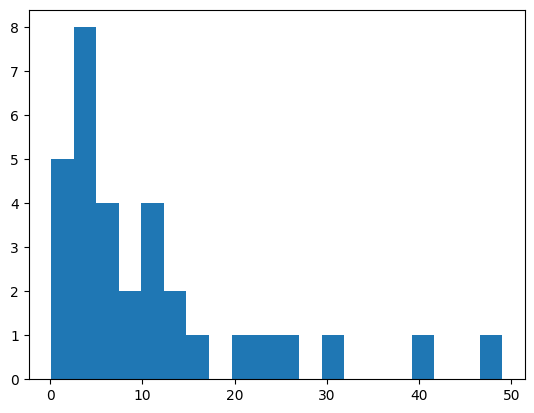

In [6]:
plt.hist(dataset['P_app'],bins=20)
plt.show()

### Task 1

Use the mols2grid package to create a visulazation of all molecules and show the passive permeability on the grid with the correct units.

We now turn the problem into a classification problem by seperating the molecules into molecules with high permeability and low permeability, by using a cutoff of 7 nm/s that will split the data set equally.



In [7]:
Permeable_cutoff = 7.0
Low_label = 0
High_label = +1
Permeable_key_str = f'Permeability High({High_label:})/Low({Low_label:})'
dataset[Permeable_key_str] = [High_label if p > Permeable_cutoff else Low_label for p in dataset['P_app']]

Number_Permeable_High = np.sum(dataset[Permeable_key_str] == +1)
Number_Permeable_Low = np.sum(dataset[Permeable_key_str] == 0)

print("Key:",Permeable_key_str)

print("Number with high permeability (above {:.1f} nm/s): {:d}".format(Permeable_cutoff,Number_Permeable_High))
print("Number with low permeability (above {:.1f} nm/s): {:d}".format(Permeable_cutoff,Number_Permeable_Low))

print("")

dataset[['P_app', Permeable_key_str] ]

Key: Permeability High(1)/Low(0)
Number with high permeability (above 7.0 nm/s): 16
Number with low permeability (above 7.0 nm/s): 16



,P_app,Permeability High(1)/Low(0)
0,31.016125,1
1,11.171392,1
2,6.480741,0
3,2.900000,0
4,0.400000,0
5,49.000000,1
6,13.700000,1
7,3.200000,0
8,17.200000,1
9,1.300000,0


In [8]:
print(dataset.keys())

Index(['Index', 'Compound', 'Smiles', 'P_app AB (nm/s)', 'P_app BA (nm/s)',
       'P_app', 'Molecular Weight (MW)', 'CharVol (characteristic volume)',
       'Flexibility (number of rotatable bonds / number of bonds)',
       'Number of Heavy Atoms (HA)', 'RingAtoms', 'Halogens', 'HeteroAtoms',
       'RotBonds (NRotB)', 'AllBonds', 'RingCount', 'NumStereo',
       'Fraction of sp3 Carbon Atoms (FSP3)', 'Hydrogen Bond Donors (HBD)',
       'Hydrogen Bond Acceptors (HBA)', 'cLogD^7.4',
       'Topological polar surface area (TPSA)',
       'Total non-polar surface area (TNSA)', 'Permeability High(1)/Low(0)'],
      dtype='object')


In [9]:
# generate a data frame with just the features and target values
features = dataset.drop(columns=['Index',
                                 'Compound',
                                 'P_app AB (nm/s)',
                                 'P_app BA (nm/s)',
                                 'P_app',
                                 'Smiles',
                                 'Permeability High(1)/Low(0)'])
target = dataset['Permeability High(1)/Low(0)']

In [10]:
features

,Molecular Weight (MW),CharVol (characteristic volume),Flexibility (number of rotatable bonds / number of bonds),Number of Heavy Atoms (HA),RingAtoms,Halogens,HeteroAtoms,RotBonds (NRotB),AllBonds,RingCount,NumStereo,Fraction of sp3 Carbon Atoms (FSP3),Hydrogen Bond Donors (HBD),Hydrogen Bond Acceptors (HBA),cLogD^7.4,Topological polar surface area (TPSA),Total non-polar surface area (TNSA)
0,896.999,803.360,0.253521,65.0,42.0,0.0,19.0,18.0,71.0,7.0,2.0,0.456522,3.0,14.0,2.64400,209.98,710.02
1,852.902,743.496,0.191176,62.0,42.0,0.0,19.0,13.0,68.0,7.0,2.0,0.395349,3.0,13.0,1.76390,217.82,642.18
2,850.930,753.592,0.191176,62.0,42.0,0.0,18.0,13.0,68.0,7.0,2.0,0.409091,3.0,12.0,2.45750,208.59,671.41
3,1020.210,896.016,0.276316,71.0,33.0,3.0,20.0,21.0,76.0,6.0,3.0,0.470588,3.0,12.0,7.70720,186.66,833.34
4,1012.704,900.176,0.236842,70.0,39.0,1.0,20.0,18.0,76.0,7.0,3.0,0.460000,5.0,14.0,7.42946,214.98,785.02
5,837.830,697.696,0.265625,59.0,34.0,3.0,19.0,17.0,64.0,6.0,1.0,0.375000,1.0,12.0,4.40258,177.04,622.96
6,1006.183,872.816,0.266667,70.0,33.0,3.0,20.0,20.0,75.0,6.0,3.0,0.460000,3.0,12.0,7.31710,186.66,813.34
7,1128.150,931.232,0.256098,77.0,33.0,9.0,26.0,21.0,82.0,6.0,3.0,0.470588,3.0,12.0,8.44280,186.66,833.34
8,1022.182,891.056,0.276316,71.0,33.0,3.0,21.0,21.0,76.0,6.0,3.0,0.460000,3.0,13.0,6.55350,195.89,804.11
9,1078.143,902.096,0.253165,74.0,33.0,7.0,24.0,20.0,79.0,6.0,3.0,0.460000,3.0,12.0,7.80750,186.66,813.34


In [11]:
target

,Permeability High(1)/Low(0)
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


### Decision Trees

Decision Trees are a simple supervised learning method that can be used for classifcation by creating a tree based on rules that split the dataset into subsets until we get a subset that is only one class.
- https://en.wikipedia.org/wiki/Decision_tree_learning
- https://scikit-learn.org/stable/modules/tree.html

The train tree can then be used to predict. The obtained tree can also be visualized.

It is a good idea to visulize the predicted values using a confusion matrix.

We then have the
- True Positives (TP)
- False Positives (FP)
- True Negatives (TN)
- False Negatives (FN)

The choice what is postive and negative is often arbitrary. Here, we consider High Permeability (> 7.0 nm) to be postive. In scikit-learn, the value of +1 is consider as the postive by default.  

To measure the performance, we can define different metrics:

- Accuracy: (TP+TN) / (TP+TN+FN+FP)
- Precision: (TP) / (TP+FP)
- Recall: (TP) / (TP+FN)

Further information and other performance metrics can be found in the [sklearn manual](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-string-names)

[Reminder on the difference between accuracy and precision](https://en.wikipedia.org/wiki/Accuracy_and_precision)



Accuracy:                 0.3750
Precision:                0.3333
Recall:                   0.4286


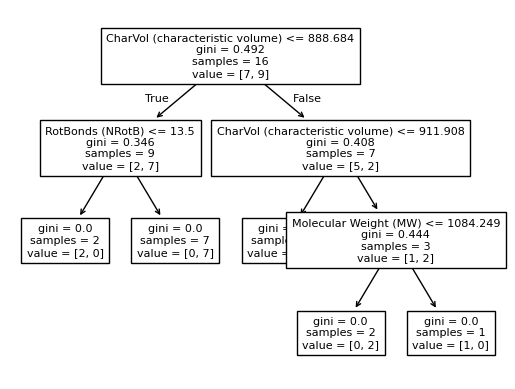

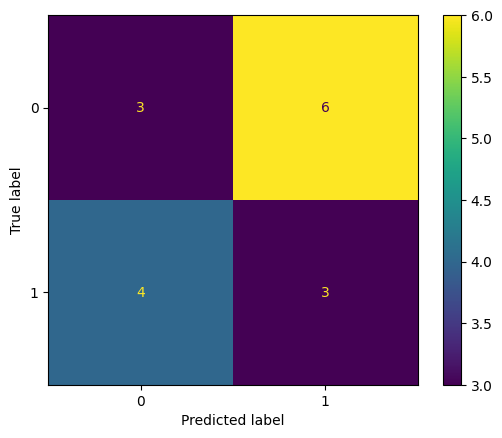

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

model = DecisionTreeClassifier()

model.fit(features_train,target_train)

target_test_predicted = model.predict(features_test)

print("Accuracy:                 {:.4f}".format(metrics.accuracy_score(target_test,target_test_predicted)))
print("Precision:                {:.4f}".format(metrics.precision_score(target_test,target_test_predicted)))
print("Recall:                   {:.4f}".format(metrics.recall_score(target_test,target_test_predicted)))




tree_plt = plot_tree(model,
                     feature_names=features.keys(),
                     fontsize=8)
cfm = metrics.ConfusionMatrixDisplay.from_predictions(target_test,target_test_predicted)

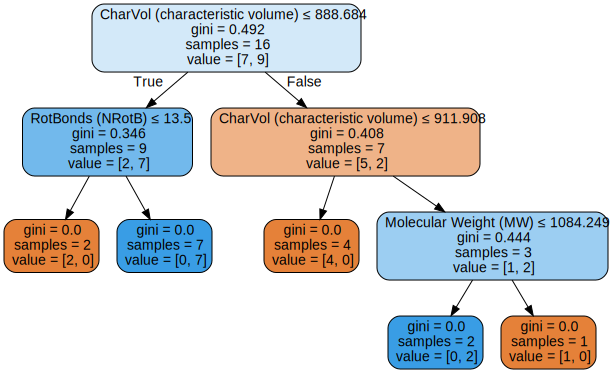

In [13]:
# A nicer way to get the tree
import graphviz
dot_data = export_graphviz(model, out_file=None,
                     feature_names=features.keys(),
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

Here we implement cross validation

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit


model = DecisionTreeClassifier()

# Evaluate the models using crossvalidation

# scoring =['accuracy', 'precision', 'recall']

scoring = {'accuracy':'accuracy',
            'recall': metrics.make_scorer(metrics.recall_score, zero_division=np.nan),
            'precision': metrics.make_scorer(metrics.precision_score, zero_division=np.nan)
}



# employ 5-fold CV
scores_fold = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=5
)

# Evaluate the models using crossvalidation
NumSplits=1000
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.5)
scores_random = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=cv_random
)

print("Accuracy")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_accuracy'].mean(),scores_fold['test_accuracy'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_accuracy'].mean(), scores_random['test_accuracy'].std()))

print("Precision")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format( np.nanmean(scores_fold['test_precision']),np.nanstd(scores_fold['test_precision'])))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, np.nanmean(scores_random['test_precision']), np.nanstd(scores_random['test_precision'])))



Accuracy
- 5-Fold CV                   : 0.376 +- 0.077
- Random Splits (1000 splits) : 0.442 +- 0.103
Precision
- 5-Fold CV                   : 0.247 +- 0.208
- Random Splits (1000 splits) : 0.451 +- 0.172


### Task 2

Repeat the analysis above using Random Forest
- https://scikit-learn.org/stable/modules/ensemble.html#random-forests
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

This is an ensemble method that creates multiple different decision trees, and predicts based on the average. In classification, values will be predicated based on the majority.

The hyperparametes in Random Forest is the number of trees. Use the default value of 100 decision trees.

Accuracy:                 0.4375
Precision:                0.3333
Recall:                   0.1250


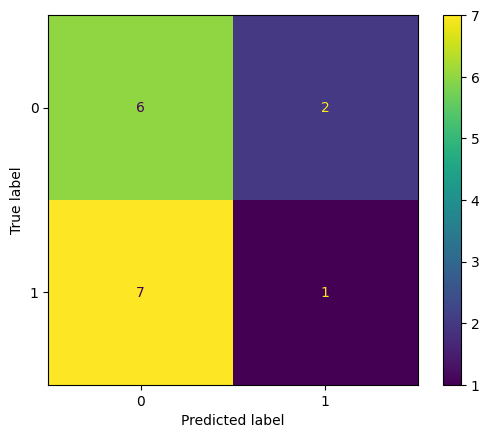

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

model = RandomForestClassifier(100)

model.fit(features_train,target_train)

target_test_predicted = model.predict(features_test)

print("Accuracy:                 {:.4f}".format(metrics.accuracy_score(target_test,target_test_predicted)))
print("Precision:                {:.4f}".format(metrics.precision_score(target_test,target_test_predicted)))
print("Recall:                   {:.4f}".format(metrics.recall_score(target_test,target_test_predicted)))


# tree_plt = plot_tree(model,
#                      feature_names=features.keys(),
#                      fontsize=8)
cfm = metrics.ConfusionMatrixDisplay.from_predictions(target_test,target_test_predicted)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit


model = RandomForestClassifier(100)

# Evaluate the models using crossvalidation

# scoring =['accuracy', 'precision', 'recall']

scoring = {'accuracy':'accuracy',
            'recall': metrics.make_scorer(metrics.recall_score, zero_division=np.nan),
            'precision': metrics.make_scorer(metrics.precision_score, zero_division=np.nan)
}



# employ 5-fold CV
scores_fold = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=5
)

# Evaluate the models using crossvalidation
NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.5)
scores_random = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=cv_random
)

print("Accuracy")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_accuracy'].mean(),scores_fold['test_accuracy'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_accuracy'].mean(), scores_random['test_accuracy'].std()))

print("Precision")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format( np.nanmean(scores_fold['test_precision']),np.nanstd(scores_fold['test_precision'])))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, np.nanmean(scores_random['test_precision']), np.nanstd(scores_random['test_precision'])))



Accuracy
- 5-Fold CV                   : 0.371 +- 0.115
- Random Splits (100 splits) : 0.415 +- 0.092
Precision
- 5-Fold CV                   : 0.330 +- 0.189
- Random Splits (100 splits) : 0.442 +- 0.179


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit


model = RandomForestClassifier(100,max_features=12)

# Evaluate the models using crossvalidation

# scoring =['accuracy', 'precision', 'recall']

scoring = {'accuracy':'accuracy',
            'recall': metrics.make_scorer(metrics.recall_score, zero_division=np.nan),
            'precision': metrics.make_scorer(metrics.precision_score, zero_division=np.nan)
}



# employ 5-fold CV
scores_fold = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=5
)

# Evaluate the models using crossvalidation
NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.5)
scores_random = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=cv_random
)

print("Accuracy")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_accuracy'].mean(),scores_fold['test_accuracy'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_accuracy'].mean(), scores_random['test_accuracy'].std()))

print("Precision")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format( np.nanmean(scores_fold['test_precision']),np.nanstd(scores_fold['test_precision'])))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, np.nanmean(scores_random['test_precision']), np.nanstd(scores_random['test_precision'])))



Accuracy
- 5-Fold CV                   : 0.467 +- 0.081
- Random Splits (100 splits) : 0.414 +- 0.090
Precision
- 5-Fold CV                   : 0.392 +- 0.245
- Random Splits (100 splits) : 0.439 +- 0.182
